In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/Shopping.csv')

In [3]:
df.head()

,Day,Discount,Free Delivery,Purchase
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekday,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekend,Yes,Yes,Yes


In [4]:
cols = ['Day', 'Discount', 'Free Delivery']
label = LabelEncoder()
for col in cols:
    df[col] = label.fit_transform(df[col])

In [5]:
df.head()

,Day,Discount,Free Delivery,Purchase
0,1,1,1,Yes
1,1,1,1,Yes
2,1,0,0,No
3,0,1,1,Yes
4,2,1,1,Yes


In [6]:
df.isnull().sum()

Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(18)

In [8]:
df.describe()

,Day,Discount,Free Delivery
count,30.000000,30.000000,30.000000
mean,0.900000,0.666667,0.766667
std,0.803012,0.479463,0.430183
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.750000,1.000000,1.000000
max,2.000000,1.000000,1.000000


Day


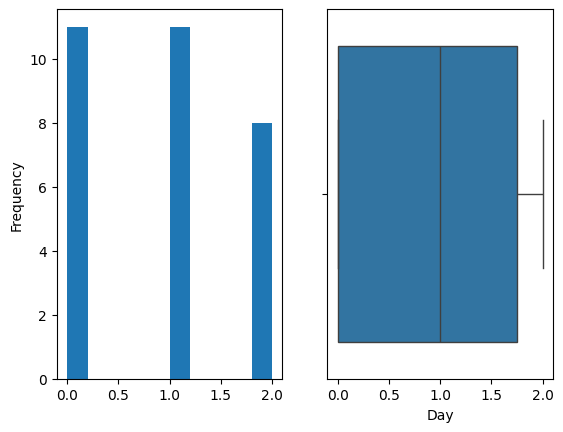

Discount


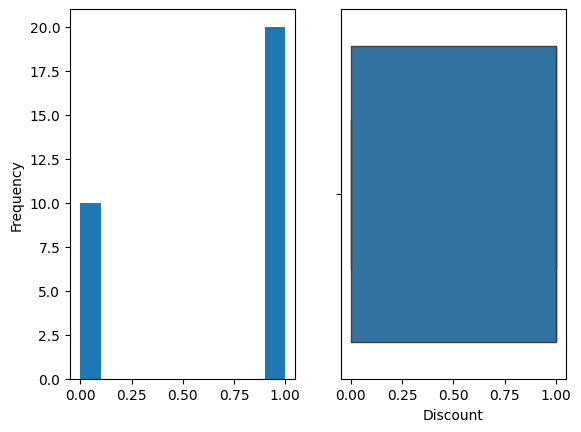

Free Delivery


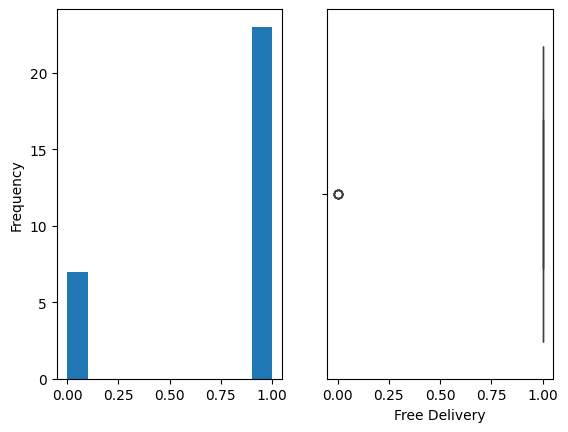

In [9]:
for col in cols:
    print(col)
    plt.subplot(1,2,1)
    plt.hist(df[col], bins = 10)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df[col])
    plt.show()

In [10]:
x = df.drop(columns  = ['Purchase'], axis = 1)
y = df['Purchase']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)

Accuracy:  1.0
classification_report:                precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [15]:
new = [[0,0,0]]
y_pred_new = model.predict(new)
print(y_pred_new)

['No']
